In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('./GSE147507_Series6,16.csv', index_col=0)
df_covrelated = pd.read_csv('./GSE147507_Series6,16_covrelated.csv', index_col=0)

cov_related_genes = df_covrelated.index

drop_genes = []
for gene in cov_related_genes:
    if 0 in list(df.loc[gene, :]):
        drop_genes.append(gene)
cov_related_genes2 = [gene for gene in cov_related_genes if gene not in drop_genes]
    
not_related_genes = [x for x in df.index if x not in cov_related_genes2]
drop_genes = []
for gene in not_related_genes:
    if 0 in list(df.loc[gene, :]):
        drop_genes.append(gene)

not_related_genes2 = random.sample([x for x in not_related_genes if x not in drop_genes], 53)

df_sample = df.loc[cov_related_genes2+not_related_genes2,:]
df_sample.to_csv('./GSE147507_sample.csv', index=True)

ACE2
AGTR1
CYBB
NFKB1
RELA
TNF
IL6
IL1B
IL12A
IL12B
MMP3
MMP1
CCL2
ISG15
IFIH1
TBK1
MBL2
MASP1
MASP2
C2
C4A
C4B
C3
C5
C6
C7
C8A
C8B
C8G
C9
C1QA
C1QB
C1QC
C1R
C1S
F2
FGA
FGB
FGG
RPS2
RPS3
RPS3A
RPS4Y2
RPS4X
RPS4Y1
RPS5
RPS6
RPS7
RPS8
RPS9
RPS10
RPS11
RPS12
RPS13
RPS14
RPS15
RPS15A
RPS16
RPS17
RPS18
RPS19
RPS20
RPS21
RPS23
RPS24
RPS25
RPS26
RPS27
RPS27A
RPS28
RPS29
FAU
RPSA
IRF3
STAT1
STAT2


In [3]:
new_dict = {}
for gene in df_sample.index:
    Series6_1 = math.log(df_sample.loc[gene, 'Series6_A549-ACE2_SARS-CoV-2_1']/df_sample.loc[gene, 'Series6_A549-ACE2_Mock_1'], 2)
    Series6_2 = math.log(df_sample.loc[gene, 'Series6_A549-ACE2_SARS-CoV-2_2']/df_sample.loc[gene, 'Series6_A549-ACE2_Mock_2'], 2)
    Series6_3 = math.log(df_sample.loc[gene, 'Series6_A549-ACE2_SARS-CoV-2_3']/df_sample.loc[gene, 'Series6_A549-ACE2_Mock_3'], 2)
    Series16_1 = math.log(df_sample.loc[gene, 'Series16_A549-ACE2_SARS-CoV-2_1']/df_sample.loc[gene, 'Series16_A549-ACE2_Mock_1'], 2)
    Series16_2 = math.log(df_sample.loc[gene, 'Series16_A549-ACE2_SARS-CoV-2_2']/df_sample.loc[gene, 'Series16_A549-ACE2_Mock_2'], 2)
    Series16_3 = math.log(df_sample.loc[gene, 'Series16_A549-ACE2_SARS-CoV-2_3']/df_sample.loc[gene, 'Series16_A549-ACE2_Mock_3'], 2)
    
    if gene in cov_related_genes2:
        new_dict[gene] = [Series6_1, Series6_2, Series6_3, Series16_1, Series16_2, Series16_3, 1]
    else:
        new_dict[gene] = [Series6_1, Series6_2, Series6_3, Series16_1, Series16_2, Series16_3, 0]

In [4]:
df_div = pd.DataFrame.from_dict(new_dict).T
df_div.columns = ['Series6_1', 'Series6_2', 'Series6_3', 'Series16_1', 'Series16_2', 'Series16_3', 'Target']
df_div.to_csv('./GSE147507_sample_div.csv', index=True)

In [5]:
x = df_div.drop(['Target'], axis=1).values
y = df_div['Target'].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2'])
principaldf['target'] = y
principaldf.index = df_div.index

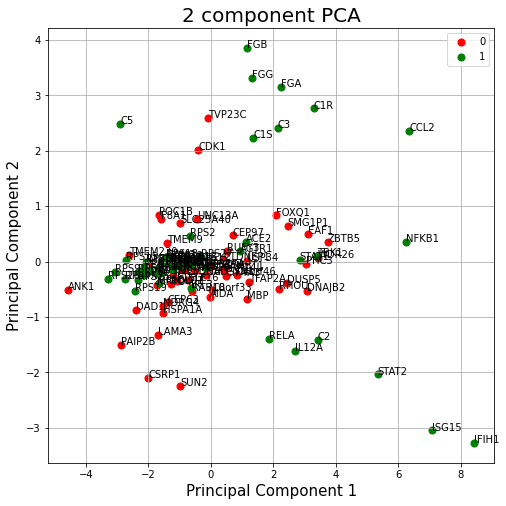

In [6]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets= [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principaldf['target'] == target
    ax.scatter(principaldf.loc[indicesToKeep, 'pc1'],
               principaldf.loc[indicesToKeep, 'pc2'],
               c = color,
               s = 50)
for i, gene in enumerate(principaldf.index.tolist()):
    ax.annotate(gene, (principaldf.loc[gene, 'pc1'], principaldf.loc[gene, 'pc2']))
ax.legend(targets)
ax.grid()

In [7]:
fig.savefig('pca.png', dpi=300)